In [1]:
import torch
from markov_bridges.configs.config_classes.data.molecules_configs import LPConfig #dataset configuration
from markov_bridges.data.dataloaders_utils import get_dataloaders 
from markov_bridges.configs.experiments_configs.mixed.edmg_experiments import get_edmg_lp_experiment

## Time required with default settings

In [2]:
#get the configuration with default settings
config = get_edmg_lp_experiment()

In [3]:
%%time
#get the dataloader class (LPDataloader) based on config.data
dataloaders = get_dataloaders(config)

CPU times: user 6.01 s, sys: 1.27 s, total: 7.28 s
Wall time: 7.28 s


In [4]:
%%time
#get train set dataloader
train_dataloader = dataloaders.train()

CPU times: user 5.58 s, sys: 444 ms, total: 6.03 s
Wall time: 6.02 s


In [5]:
%%time
#get validation set dataloader
valid_dataloader = dataloaders.valid()

CPU times: user 6.2 s, sys: 743 ms, total: 6.94 s
Wall time: 6.99 s


In [6]:
%%time
#get test set dataloader
test_dataloader = dataloaders.test()

CPU times: user 6.01 s, sys: 540 ms, total: 6.56 s
Wall time: 6.55 s


## Example 1: dataloader with default settings

In [7]:
#get the configuration with default settings
config = get_edmg_lp_experiment()

#get the dataloader class (LPDataloader) based on config.data
dataloaders = get_dataloaders(config)

In [8]:
#check the info of our dataloaders using the attribute .dataset_info
dataloaders.dataset_info

{'General_Configuration': {'batch_size': 32,
  'num_workers': 6,
  'max_num_protein_nodes': 500,
  'accept_variable_bs': False,
  'padding_dependence': 'batch',
  'num_pts_train': -1,
  'num_pts_valid': -1,
  'num_pts_test': -1,
  'shuffle_train': True,
  'shuffle_valid': False,
  'shuffle_test': False,
  'train_path': '/home/piazza/markov_bridges/LP_Data/RestyledReducedDiffusionDataset/train.pt',
  'valid_path': '/home/piazza/markov_bridges/LP_Data/RestyledReducedDiffusionDataset/validation.pt',
  'test_path': '/home/piazza/markov_bridges/LP_Data/RestyledReducedDiffusionDataset/test.pt'},
 'train': {'number_of_instances': 10690,
  'count_linker_gen_nodes': {3: 267,
   4: 347,
   5: 368,
   6: 396,
   7: 415,
   8: 437,
   9: 461,
   10: 500,
   11: 498,
   12: 508,
   13: 522,
   14: 489,
   15: 535,
   16: 494,
   17: 492,
   18: 425,
   19: 413,
   20: 397,
   21: 373,
   22: 352,
   23: 275,
   24: 224,
   25: 234,
   26: 181,
   27: 152,
   28: 156,
   29: 124,
   30: 99,
   31: 8

In [9]:
#get the keys that we find in each batch
dataloaders.get_databatch_keys()

['uuid',
 'name',
 'position_linker_gen',
 'category_linker_gen',
 'position_fragment',
 'category_fragment',
 'position_protein',
 'category_protein',
 'num_linker_gen_nodes',
 'num_fragment_nodes',
 'num_protein_nodes',
 'linker_edge_list',
 'fragment_edge_list',
 'protein_chopped_edge_list',
 'mask_position_linker_gen',
 'mask_position_fragment',
 'mask_position_protein',
 'mask_category_linker_gen',
 'mask_category_fragment',
 'mask_category_protein',
 'mask_edge_list_linker_gen',
 'mask_edge_list_fragment',
 'mask_edge_list_protein']

In [10]:
#get an example batch
dataloaders.get_databatch()

{'uuid': [5265,
  7442,
  1183,
  5027,
  11117,
  1442,
  3532,
  2933,
  5597,
  1925,
  4349,
  7725,
  1842,
  10309,
  652,
  4365,
  10249,
  436,
  6680,
  11343,
  5364,
  8214,
  11397,
  8923,
  1475,
  7162,
  1881,
  1303,
  7341,
  3384,
  338,
  3235],
 'name': ['2AM4_LigandSample-577-3Features.pdb',
  '1IZI_LigandSample-1580-4Features.pdb',
  '5M3A_LigandSample-4-4Features.pdb',
  '5UT5_LigandSample-169-4Features.pdb',
  '1S2A_LigandSample-132-3Features.pdb',
  '3OW6_LigandSample-2-3Features.pdb',
  '5KWW_LigandSample-78-3Features.pdb',
  '2UZV_LigandSample-121-4Features.pdb',
  '6TOK_LigandSample-3-5Features.pdb',
  '1TA2_LigandSample-379-4Features.pdb',
  '4EYR_LigandSample-489-4Features.pdb',
  '5JOG_LigandSample-125-4Features.pdb',
  '2H4K_LigandSample-147-4Features.pdb',
  '3IVH_LigandSample-119-4Features.pdb',
  '4IZY_LigandSample-32-3Features.pdb',
  '3FY8_LigandSample-107-3Features.pdb',
  '5TPG_LigandSample-1331-4Features.pdb',
  '5MMP_LigandSample-0-4Features.p

In [11]:
#get the test set dataloader by calling the .test() method on the dataloaders instance
test_dataloader = dataloaders.test()

#retrieve the second batch from the test dataloader
for i, test_batch in enumerate(test_dataloader):
    if i == 1:
        second_test_batch = test_batch
second_test_batch

{'uuid': [36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71],
 'name': ['5U0G_LigandSample-185-4Features.pdb',
  '5U0G_LigandSample-251-5Features.pdb',
  '2ZNN_LigandSample-237-3Features.pdb',
  '2ZNN_LigandSample-582-4Features.pdb',
  '2F38_LigandSample-22-5Features.pdb',
  '2F38_LigandSample-34-4Features.pdb',
  '4ZO5_LigandSample-353-3Features.pdb',
  '4ZO5_LigandSample-1209-3Features.pdb',
  '1W6R_LigandSample-84-5Features.pdb',
  '1W6R_LigandSample-49-3Features.pdb',
  '7JO0_LigandSample-3-5Features.pdb',
  '7JO0_LigandSample-0-5Features.pdb',
  '4I4F_LigandSample-81-3Features.pdb',
  '4I4F_LigandSample-57-5Features.pdb',
  '3ZCU_LigandSample-191-3Features.pdb',
  '3ZCU_LigandSample-192-3Features.pdb',
  '4I9O_LigandSample-150-3Features.pdb',
  '4I9O_LigandSample-471-4Features.pdb',
  '3HRF_LigandSample-47-3Features.pdb',
  '3HRF_LigandSample-8

## Example 2: dataloader with custom settings

In [12]:
#get the configuration with default settings
config_ = get_edmg_lp_experiment()

#change some default settings to custom values
config_.data = LPConfig(batch_size=16, #reduce batch size
                      shuffle_test=True, #apply shuffle to test set
                      num_pts_test=100) #select only 100 test instances

#get the dataloader class (LPDataloader) based on config.data
dataloaders_ = get_dataloaders(config_)

#get the info of this custom dataloader
dataloaders_.dataset_info #see that now General_Configuration changed and also num_test_instance is 100

{'General_Configuration': {'batch_size': 16,
  'num_workers': 6,
  'max_num_protein_nodes': 500,
  'accept_variable_bs': False,
  'padding_dependence': 'batch',
  'num_pts_train': -1,
  'num_pts_valid': -1,
  'num_pts_test': 100,
  'shuffle_train': True,
  'shuffle_valid': False,
  'shuffle_test': True,
  'train_path': '/home/piazza/markov_bridges/LP_Data/RestyledReducedDiffusionDataset/train.pt',
  'valid_path': '/home/piazza/markov_bridges/LP_Data/RestyledReducedDiffusionDataset/validation.pt',
  'test_path': '/home/piazza/markov_bridges/LP_Data/RestyledReducedDiffusionDataset/test.pt'},
 'train': {'number_of_instances': 10690,
  'count_linker_gen_nodes': {3: 267,
   4: 347,
   5: 368,
   6: 396,
   7: 415,
   8: 437,
   9: 461,
   10: 500,
   11: 498,
   12: 508,
   13: 522,
   14: 489,
   15: 535,
   16: 494,
   17: 492,
   18: 425,
   19: 413,
   20: 397,
   21: 373,
   22: 352,
   23: 275,
   24: 224,
   25: 234,
   26: 181,
   27: 152,
   28: 156,
   29: 124,
   30: 99,
   31: 8

In [13]:
#get the test set dataloader by calling the .test() method on the dataloaders instance
test_dataloader_ = dataloaders_.test()

#retrieve the second batch from the test dataloader
for i, test_batch in enumerate(test_dataloader_):
    if i == 1:
        second_test_batch_ = test_batch
second_test_batch_

{'uuid': [41, 106, 38, 72, 33, 97, 45, 71, 6, 70, 39, 36, 61, 78, 92, 74],
 'name': ['2F38_LigandSample-34-4Features.pdb',
  '4G2G_LigandSample-1-4Features.pdb',
  '2ZNN_LigandSample-237-3Features.pdb',
  '6ESN_LigandSample-3979-5Features.pdb',
  '2YC3_LigandSample-0-3Features.pdb',
  '2Y81_LigandSample-262-4Features.pdb',
  '1W6R_LigandSample-49-3Features.pdb',
  '6O9X_LigandSample-0-4Features.pdb',
  '5U8A_LigandSample-1-4Features.pdb',
  '6O9X_LigandSample-6-3Features.pdb',
  '2ZNN_LigandSample-582-4Features.pdb',
  '5U0G_LigandSample-185-4Features.pdb',
  '5YH8_LigandSample-14-5Features.pdb',
  '1O4I_LigandSample-3-3Features.pdb',
  '1TD7_LigandSample-6-4Features.pdb',
  '1AI5_LigandSample-2-3Features.pdb'],
 'position_linker_gen': tensor([[[ 22.9590, -12.0970,  37.5670],
          [ 21.5580, -11.4500,  37.7290],
          [ 21.1910, -11.1600,  39.1600],
          ...,
          [  0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,   0.0000],
          [  0.0000,   0.0000,

## Plots with dataset_info data using default settings

In [14]:
import matplotlib.pyplot as plt

In [15]:
#get the dataset_info dictionary
default_dataset_info = dataloaders.dataset_info

#get train, valid and test info
train_info, valid_info, test_info = default_dataset_info["train"], default_dataset_info["valid"], default_dataset_info["test"]

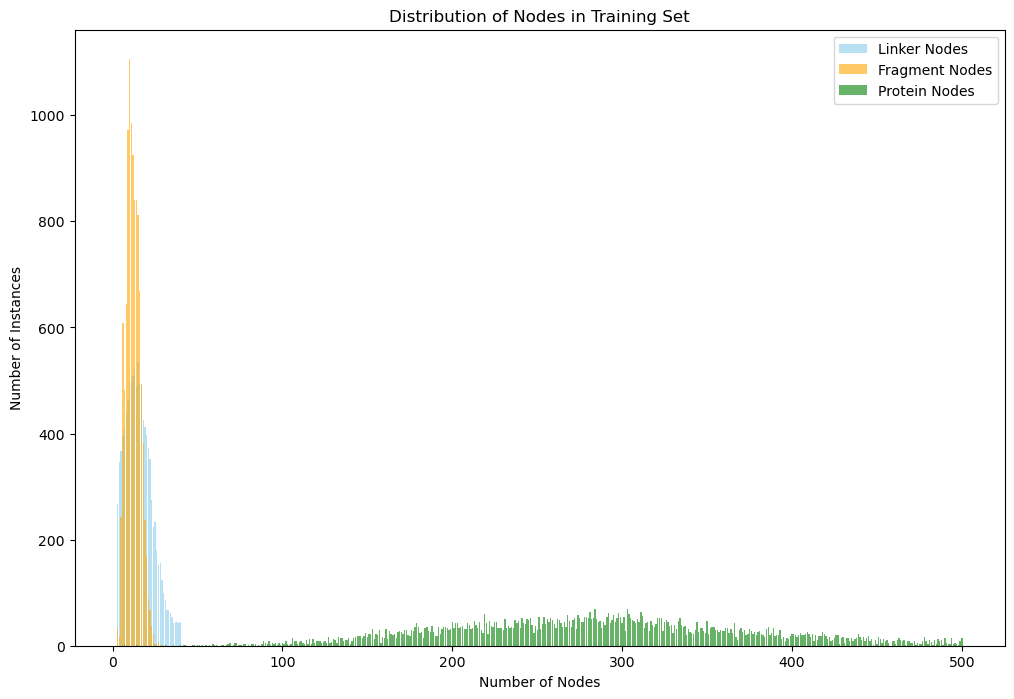

In [16]:
#plot for train
number_of_instances = train_info['number_of_instances']
count_linker_gen_nodes = train_info['count_linker_gen_nodes']
count_fragment_nodes = train_info['count_fragment_nodes']
count_protein_nodes = train_info['count_protein_nodes']

# Function to plot the histogram from a count dictionary
def plot_histogram(data, label, color):
    num_nodes = list(data.keys())
    frequencies = list(data.values())
    plt.bar(num_nodes, frequencies, label=label, color=color, alpha=0.6)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each histogram
plot_histogram(count_linker_gen_nodes, 'Linker Nodes', 'skyblue')
plot_histogram(count_fragment_nodes, 'Fragment Nodes', 'orange')
plot_histogram(count_protein_nodes, 'Protein Nodes', 'green')

# Adding labels and title
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Instances')
plt.title('Distribution of Nodes in Training Set')

# Adding legend
plt.legend()

# Display the plot
plt.show()

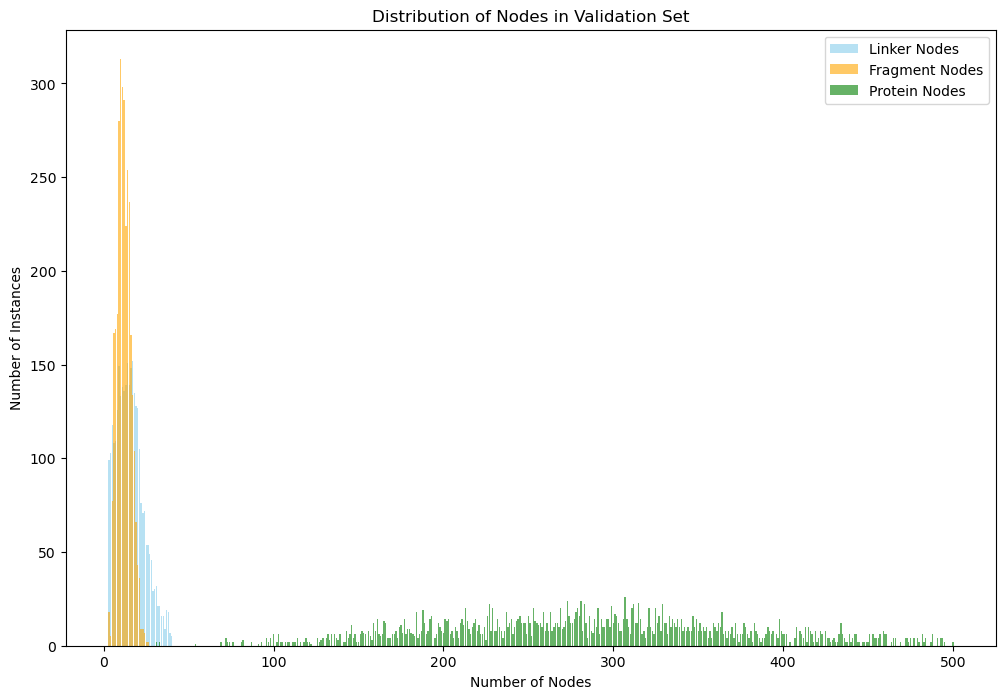

In [17]:
#plot for validation
number_of_instances = valid_info['number_of_instances']
count_linker_gen_nodes = valid_info['count_linker_gen_nodes']
count_fragment_nodes = valid_info['count_fragment_nodes']
count_protein_nodes = valid_info['count_protein_nodes']

# Function to plot the histogram from a count dictionary
def plot_histogram(data, label, color):
    num_nodes = list(data.keys())
    frequencies = list(data.values())
    plt.bar(num_nodes, frequencies, label=label, color=color, alpha=0.6)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each histogram
plot_histogram(count_linker_gen_nodes, 'Linker Nodes', 'skyblue')
plot_histogram(count_fragment_nodes, 'Fragment Nodes', 'orange')
plot_histogram(count_protein_nodes, 'Protein Nodes', 'green')

# Adding labels and title
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Instances')
plt.title('Distribution of Nodes in Validation Set')

# Adding legend
plt.legend()

# Display the plot
plt.show()

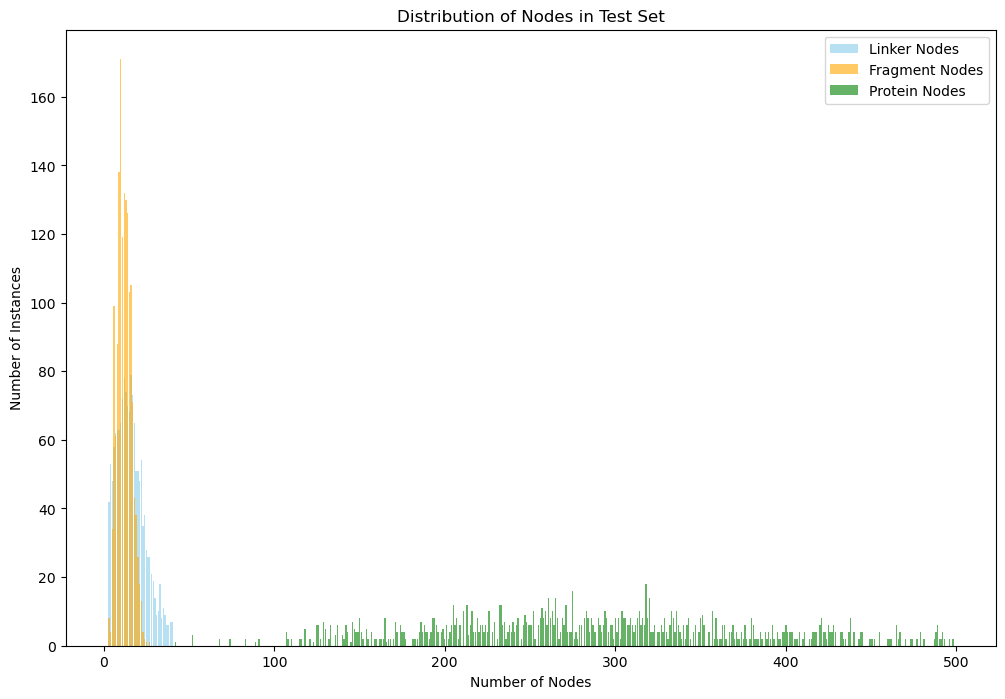

In [18]:
#plot for test
number_of_instances = test_info['number_of_instances']
count_linker_gen_nodes = test_info['count_linker_gen_nodes']
count_fragment_nodes = test_info['count_fragment_nodes']
count_protein_nodes = test_info['count_protein_nodes']

# Function to plot the histogram from a count dictionary
def plot_histogram(data, label, color):
    num_nodes = list(data.keys())
    frequencies = list(data.values())
    plt.bar(num_nodes, frequencies, label=label, color=color, alpha=0.6)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each histogram
plot_histogram(count_linker_gen_nodes, 'Linker Nodes', 'skyblue')
plot_histogram(count_fragment_nodes, 'Fragment Nodes', 'orange')
plot_histogram(count_protein_nodes, 'Protein Nodes', 'green')

# Adding labels and title
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Instances')
plt.title('Distribution of Nodes in Test Set')

# Adding legend
plt.legend()

# Display the plot
plt.show()